In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [132]:
#pip install scikit-learn

### Load the dataframe

In [133]:
df = pd.read_csv('placement.csv')

# Predicting Student Placements

<span style="color: green; font-size: 18px;">Data Preprocessing</span>


In [134]:
df = df.loc[:, ~df.columns.str.contains('Unnamed', case=False)]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<span style="color: purple; font-size: 18px;">Shape & Size</span>


In [135]:
df.shape , df.size

((100, 3), 300)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<span style="color: green; font-size: 18px;">Exploratory Data Analysis (EDA)</span>


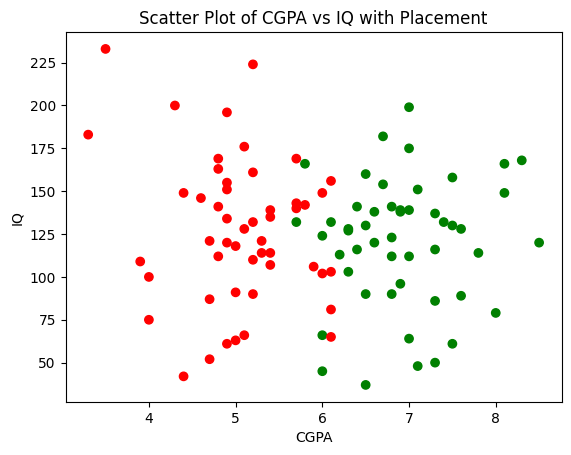

In [137]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'], c=df['placement'].map({0: 'red', 1: 'green'}))
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ with Placement')
#plt.colorbar(label="Placement (0 = Not Placed, 1 = Placed)")
plt.show()



<span style="color: green; font-size: 18px;">Feature Selection</span>


## Extract Input and output columns

In [138]:
X = df.iloc[:,0:2]
print(X.shape)
X

(100, 2)


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [139]:
y= df.iloc[:,2]
print(y.shape)
y

(100,)


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [165]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<span style="color: green; font-size: 18px;">Scalling Numbers to -1 to +1</span>


In [166]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [167]:
#X_train,X_train_scaller

## Model Training

In [170]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X_train_scaled, y_train)

LogisticRegression()

In [171]:
print("Coefficients:", clr.coef_)
print("Intercept:", clr.intercept_)


Coefficients: [[3.18858741 0.27019363]]
Intercept: [-0.0070826]


# Evalute the model /model selection

In [178]:
y_pred = clr.predict(X_test_scaled)

In [187]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.85

In [182]:
from mlxtend.plotting import plot_decision_regions

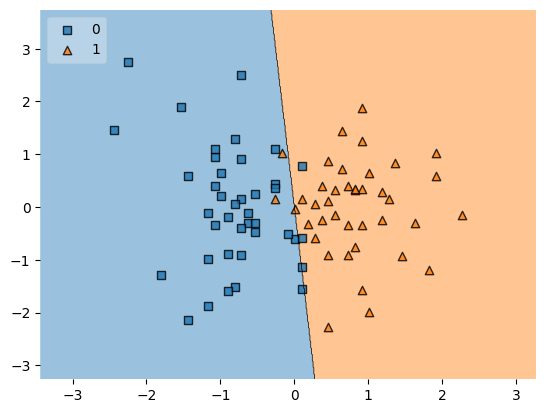

In [193]:
fig = plot_decision_regions(X=X_train_scaled, y=y_train.values, clf=clr, legend=2)

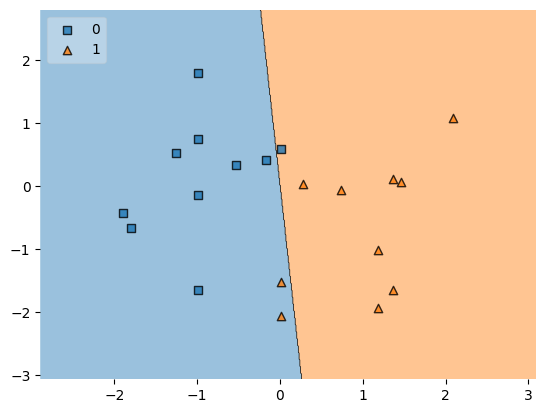

In [195]:
fig = plot_decision_regions(X=X_test_scaled, y=y_test.values, clf=clr, legend=2)

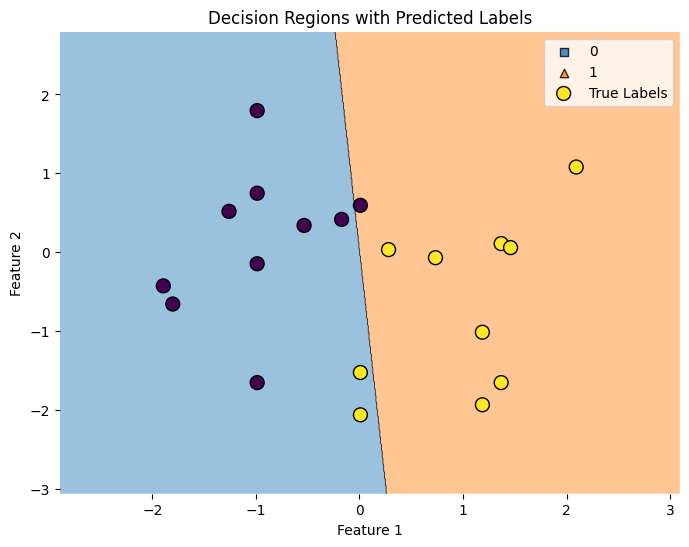

In [194]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Ensure you're using only 2 features
X_test_2D = X_test_scaled[:, :2]  # If you have more than 2 features, select first two

plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_2D, y_pred, clf=clr, legend=2)

# Overlay actual test data
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolors='k', marker='o', s=100, label="True Labels")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Regions with Predicted Labels")
plt.legend()
plt.show()


In [183]:
#pip install mlxtend